In [ ]:
Step1:Problem statement
To predict diabetes in female patients of Pima Indian heritage based on diagnostic measurement

Goal We will build a machine learning model to check if a Pima Indian woman has diabetes based on her medical details.
This will help find high-risk patients early so they can get care or treatment on time.
preg: Number of times pregnant.

plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

pres: Diastolic blood pressure (mm Hg).

skin: Triceps skin fold thickness (mm).

test: 2-Hour serum insulin (mu U/ml).

mass: Body mass index (weight in kg/(height in m)^2).

pedi: Diabetes pedigree function.

age: Age (years).

class: Class variable (0 or 1) indicating whether the patient has diabetes or not (1: diabetic, 0: not diabetic).

In [3]:
#Step 2 Data Collect
import pandas as pd
import numpy as np

In [5]:
df =  pd.read_csv("pima-indians-diabetes (1).csv")

In [7]:
df

Preg  Plas  Pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]

In [9]:
#Step 3 EDA  To understand dataset
df.head(5)

Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [11]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [17]:
df.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [19]:
df.describe()

Preg        Plas        Pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

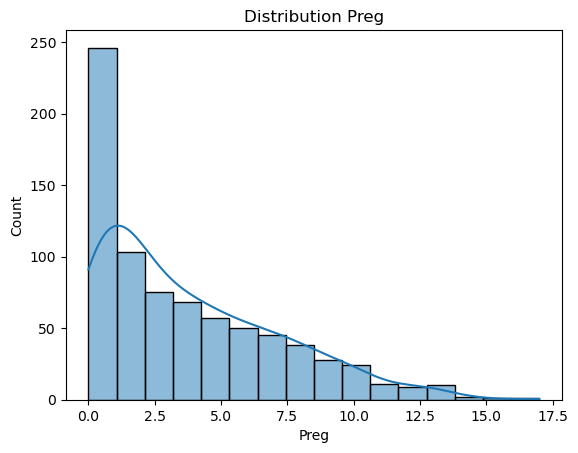

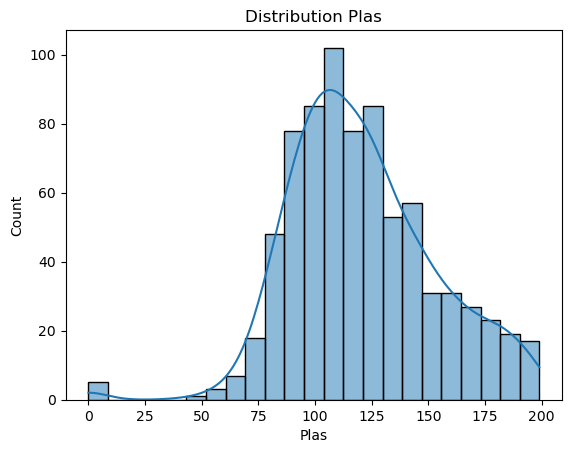

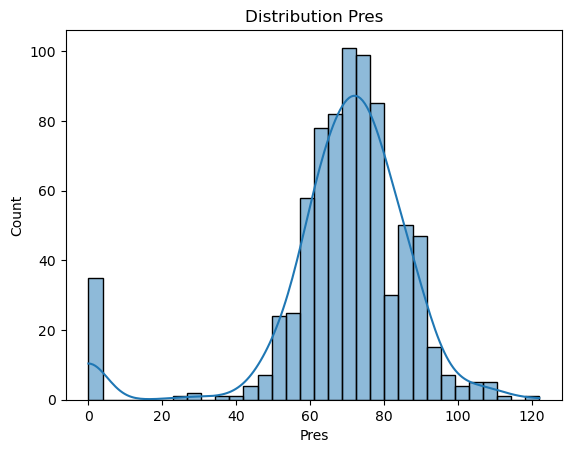

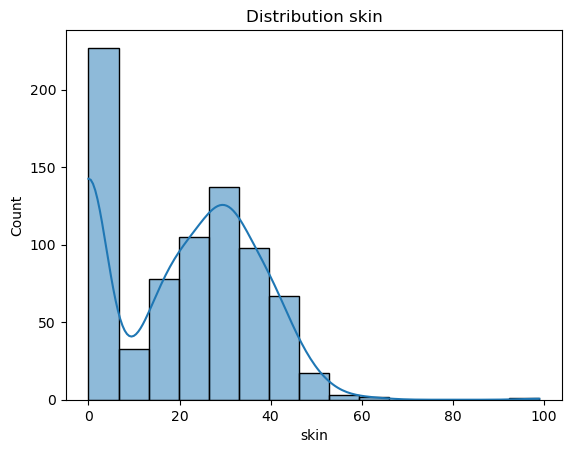

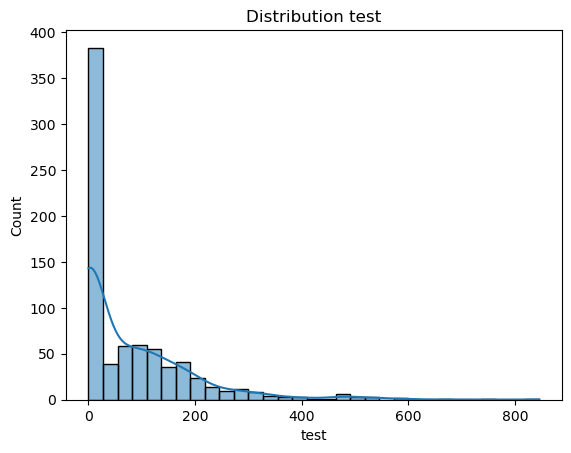

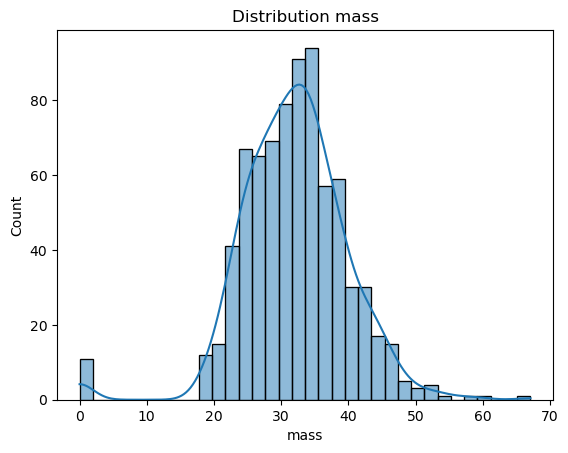

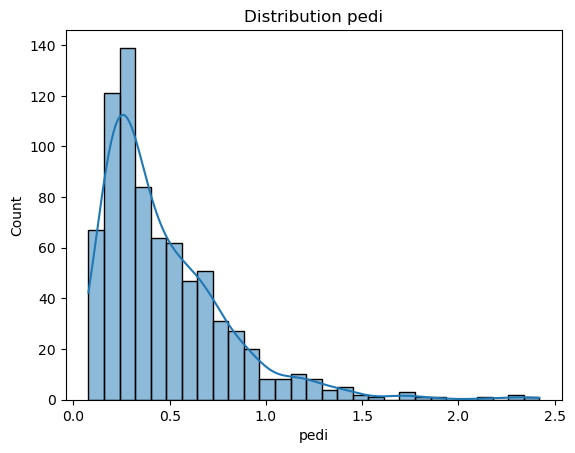

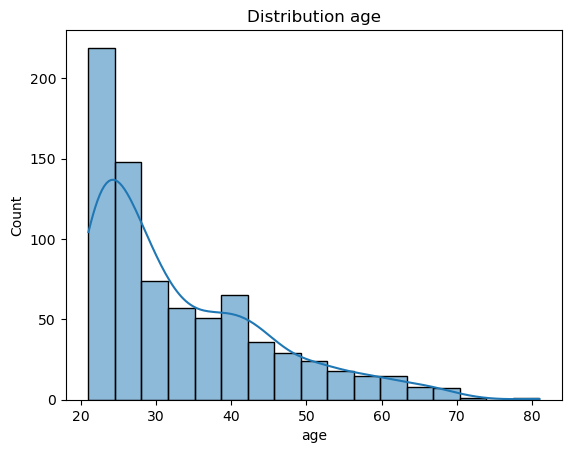

In [21]:
#Univarient graph
#histplot boxplot kdeplot
import seaborn as sns
import matplotlib.pyplot as plt

col = ["Preg",	"Plas",	"Pres",	"skin",	"test",	"mass",	"pedi",	"age"]

for i in col:
    sns.histplot(df[i], kde=True)
    plt.title(f"Distribution {i}")
    plt.show()
    

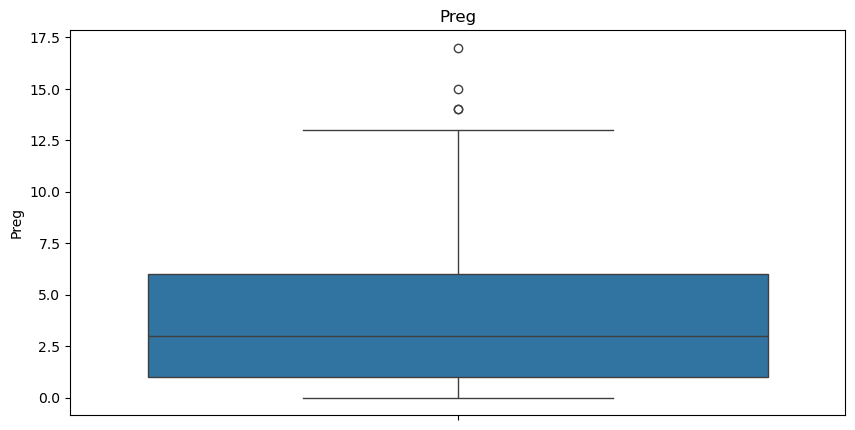

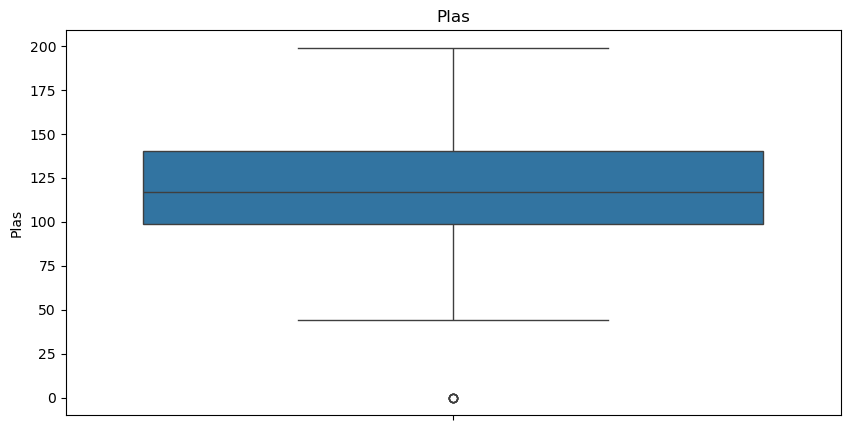

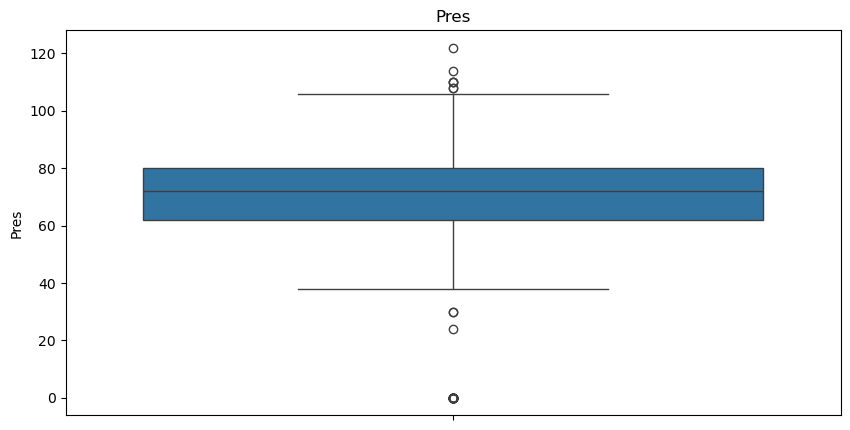

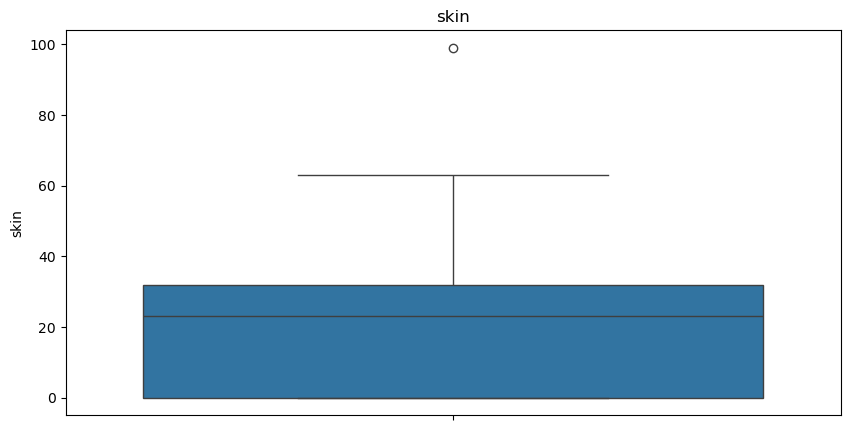

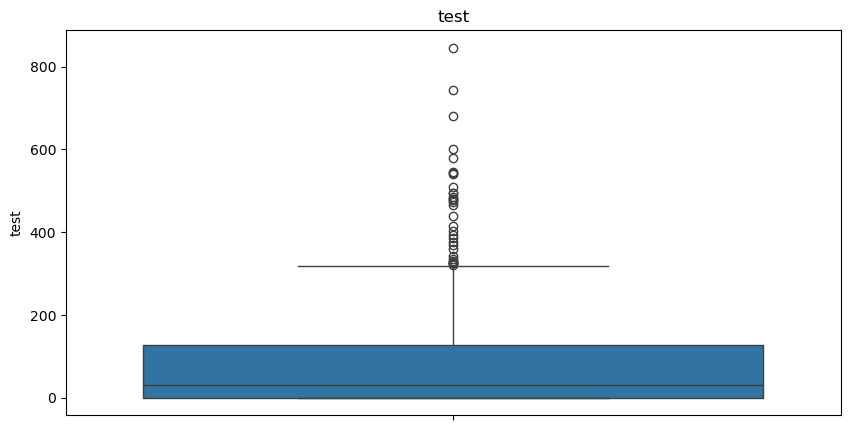

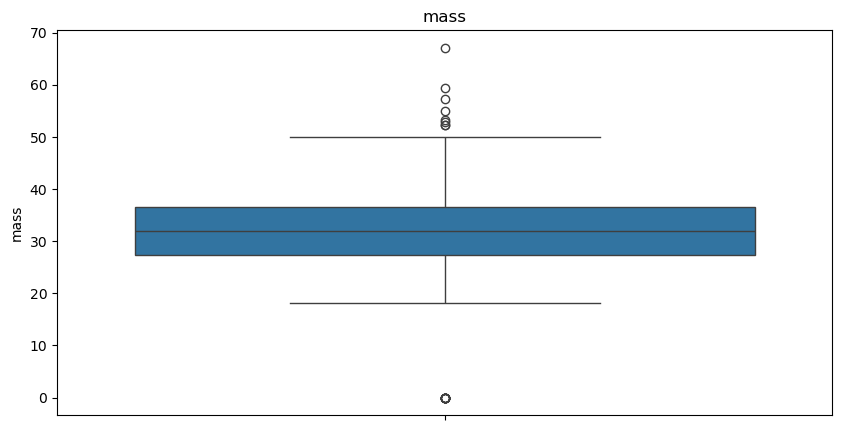

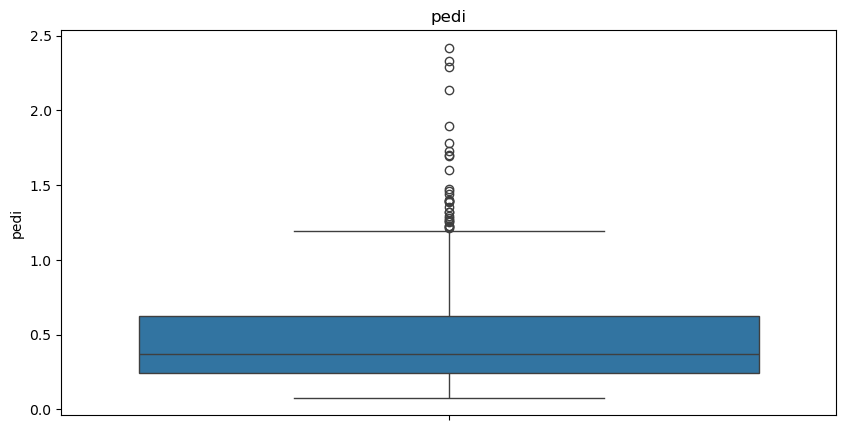

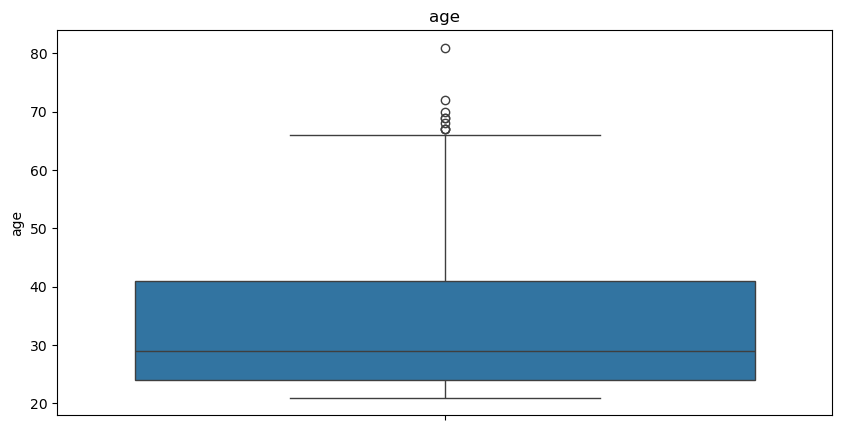

In [22]:
col = ["Preg",	"Plas",	"Pres",	"skin",	"test",	"mass",	"pedi",	"age"]

for i in col:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [23]:
#number of frequency in class category
df["class"].value_counts() 

class
0    500
1    268
Name: count, dtype: int64

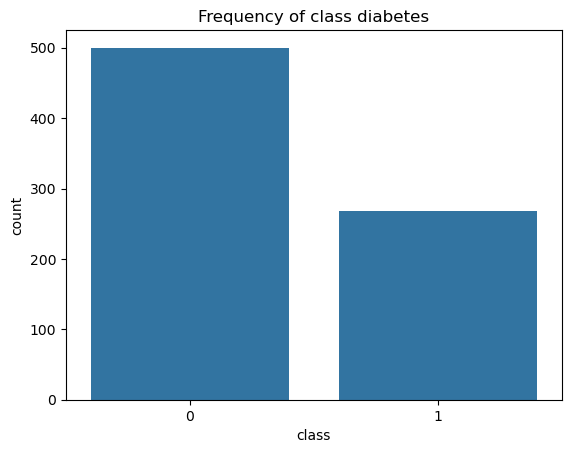

In [24]:
a = df["class"].value_counts()
sns.barplot(a)
plt.title("Frequency of class diabetes")
plt.show()

In [25]:
#group by category
df.groupby(["class"]).count()

Preg  Plas  Pres  skin  test  mass  pedi  age
class                                               
0       500   500   500   500   500   500   500  500
1       268   268   268   268   268   268   268  268

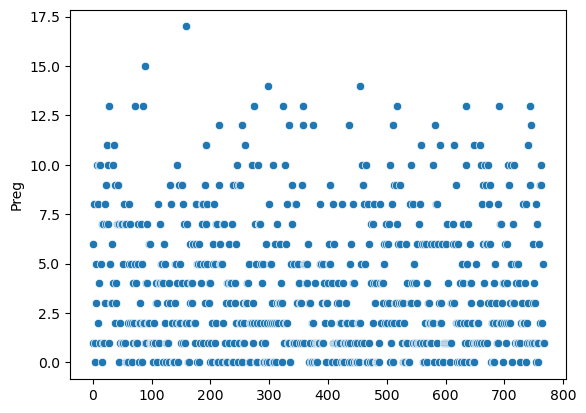

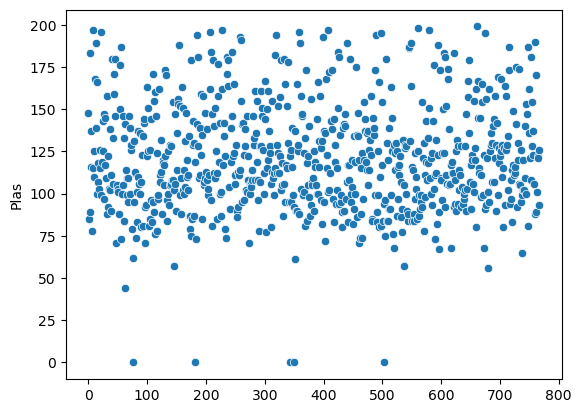

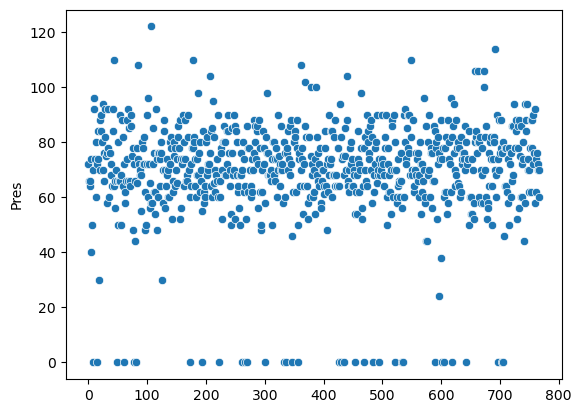

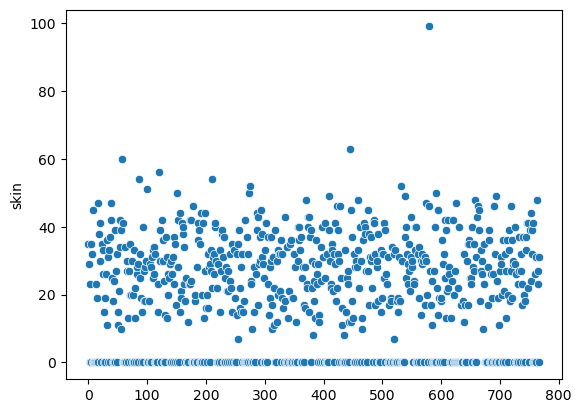

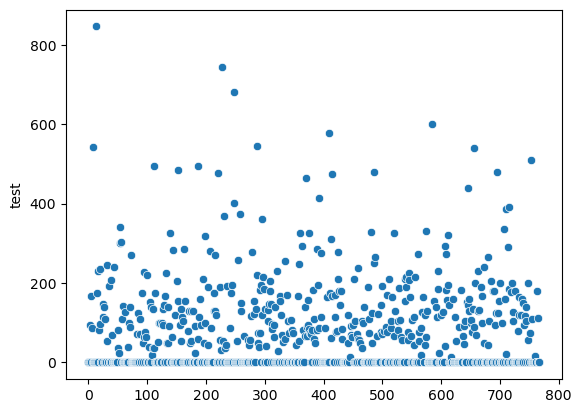

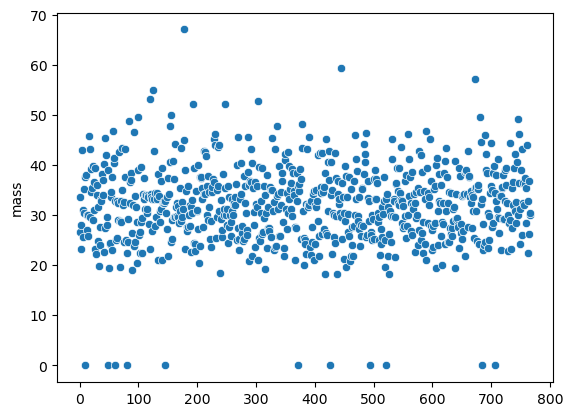

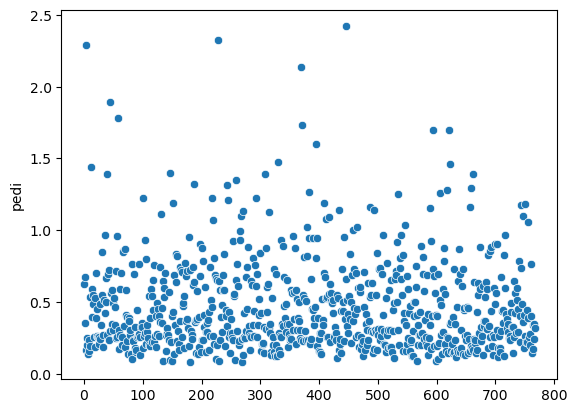

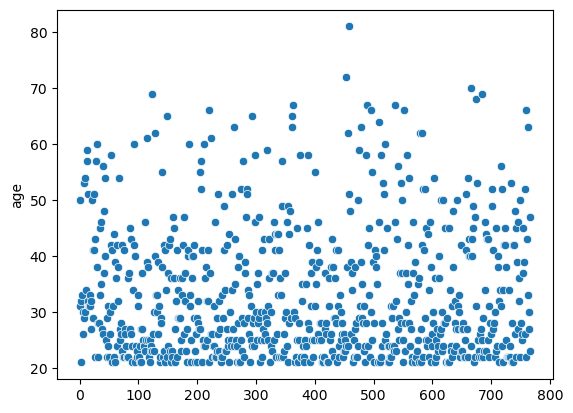

In [26]:
#Bivarient
#scatterplot lineplot barplot 
col = ["Preg",	"Plas",	"Pres",	"skin",	"test",	"mass",	"pedi",	"age"]

for i in col:
    sns.scatterplot(df[i])
    plt.show()

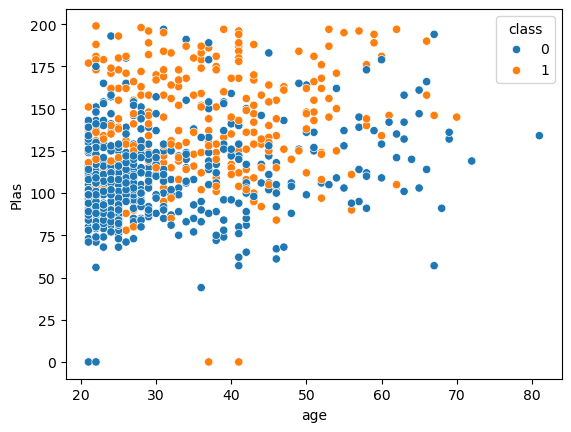

In [27]:
sns.scatterplot(x=df["age"], y=df["Plas"], data=df, hue="class")
plt.show()

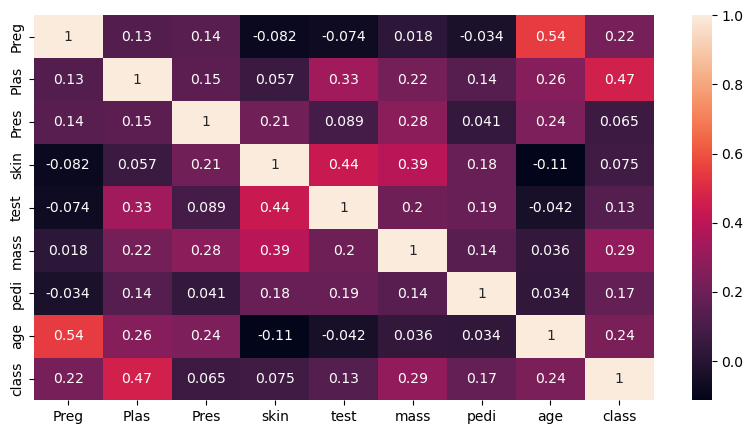

In [28]:
#Multiple varient
a = df.corr()
a
plt.figure(figsize=(10,5))
sns.heatmap(a, annot=True)
plt.show()


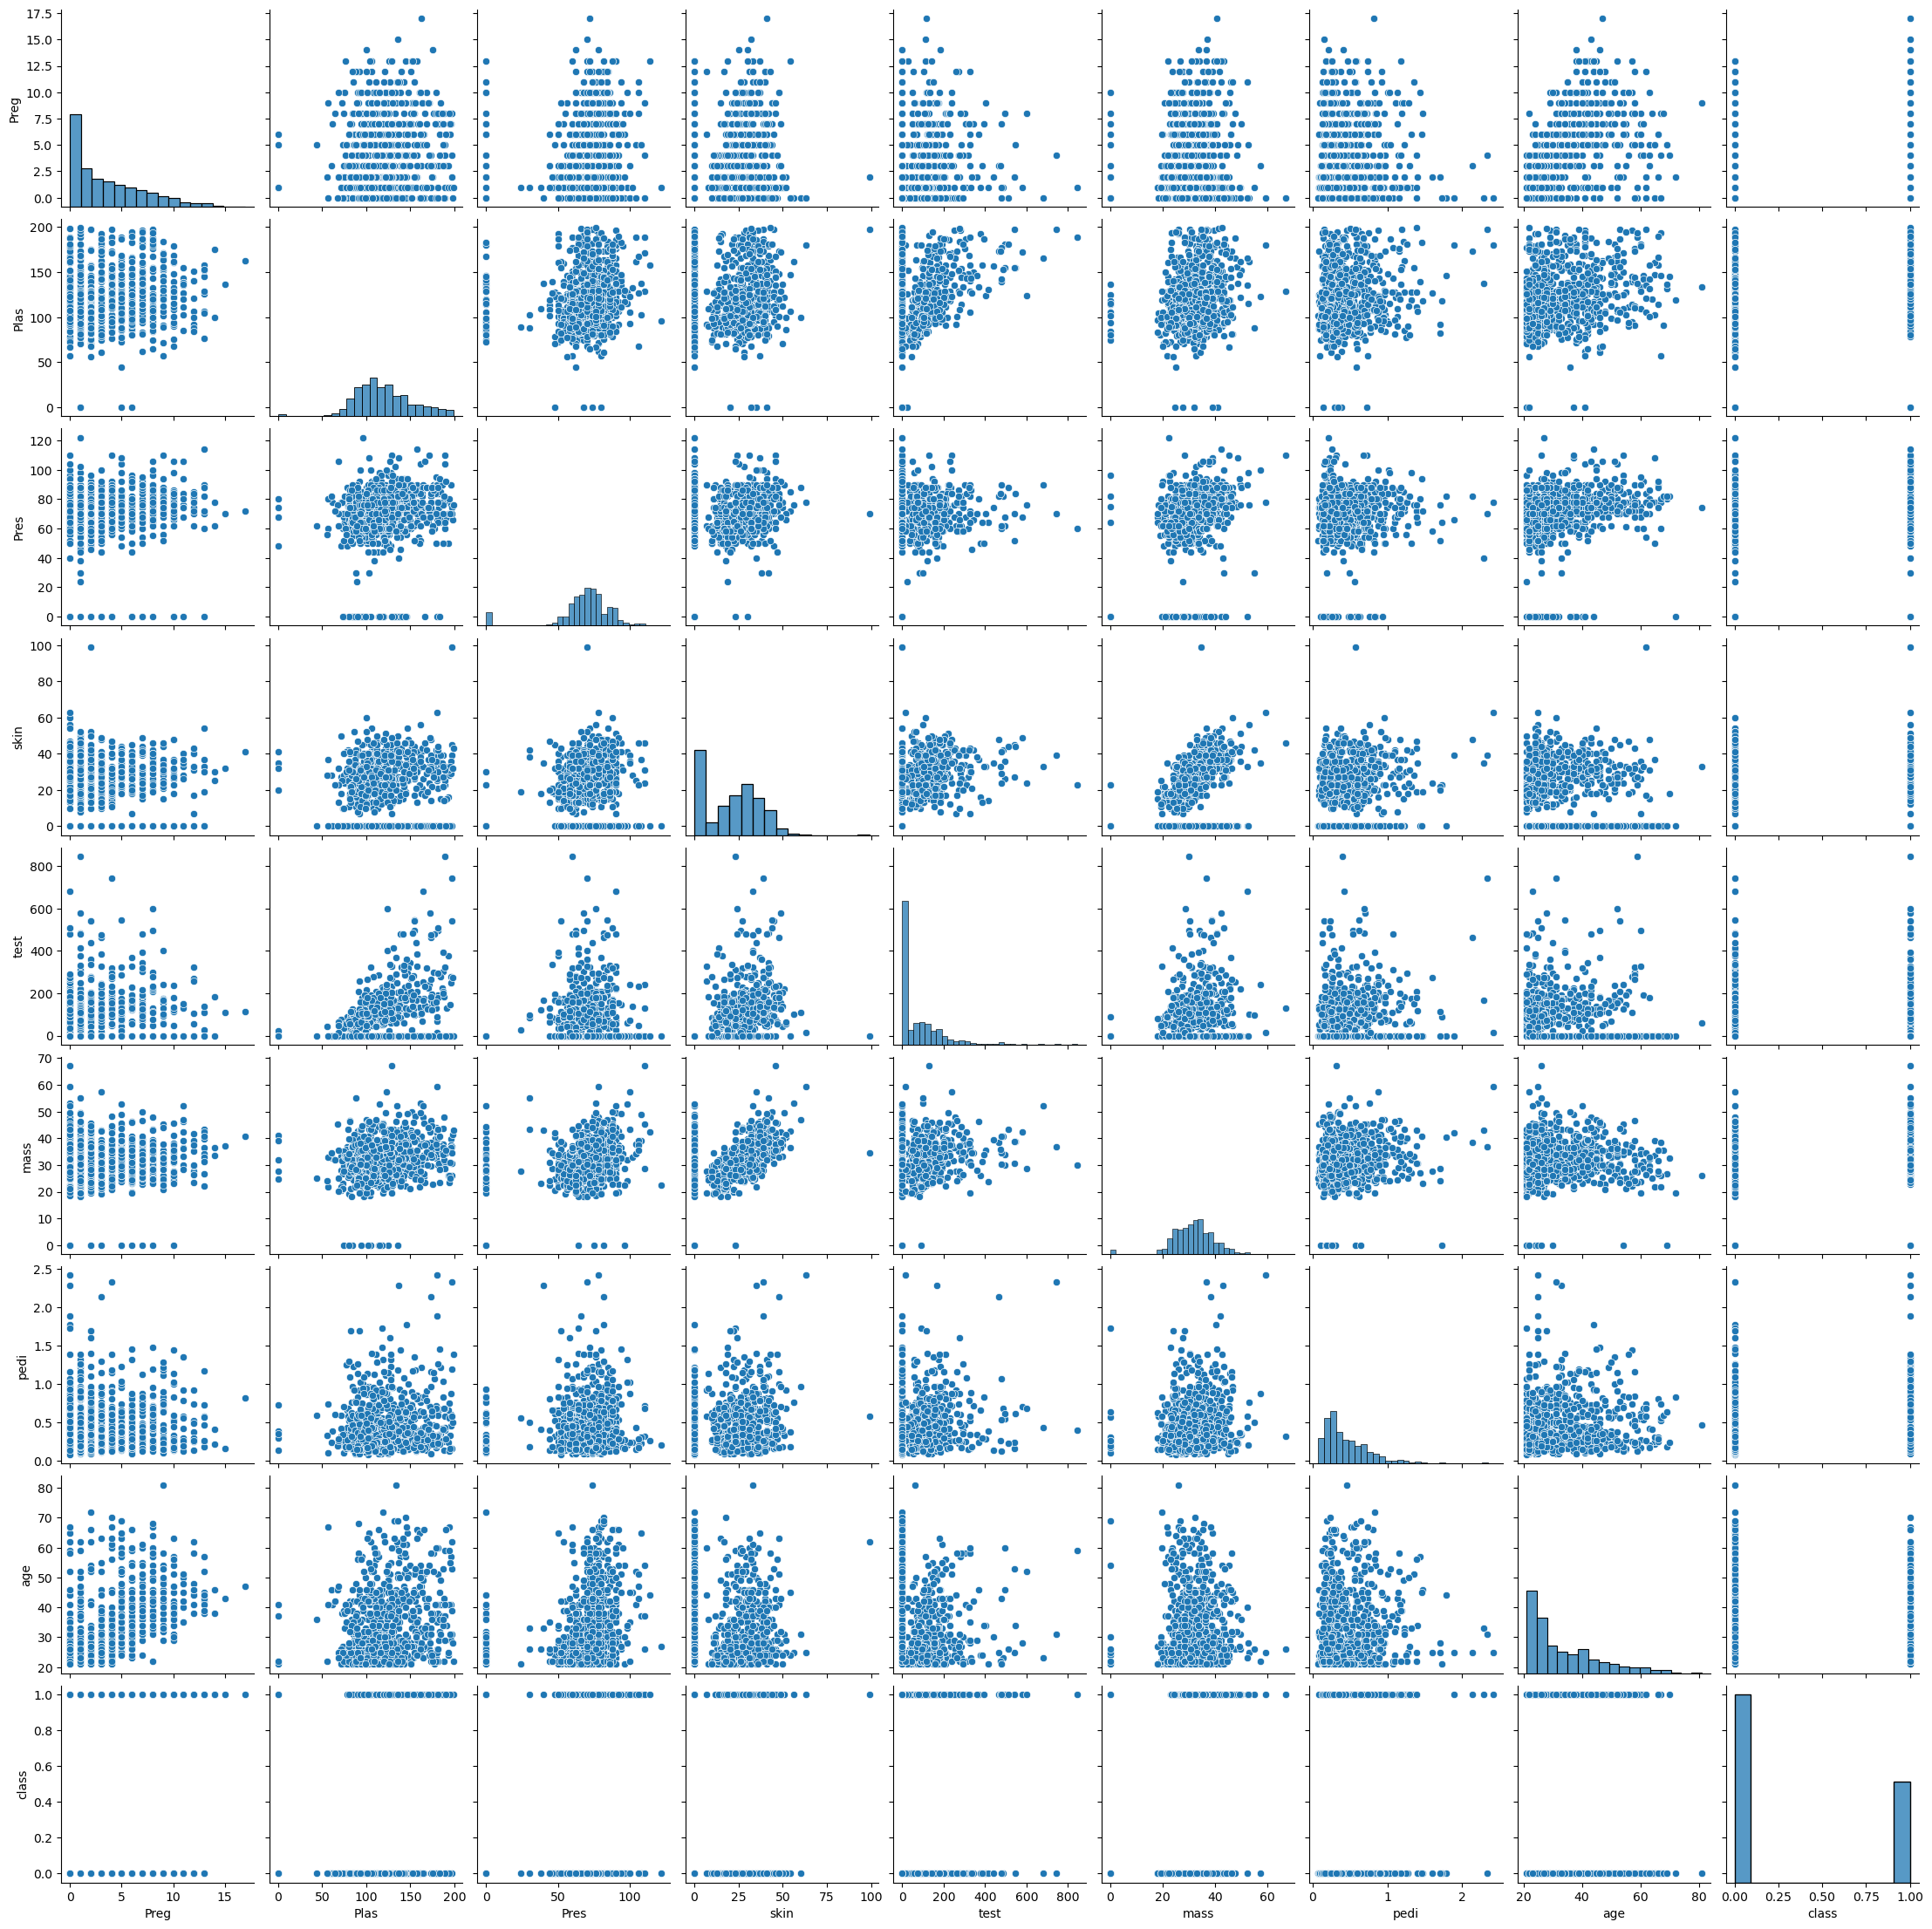

In [29]:
sns.pairplot(df)
plt.show()

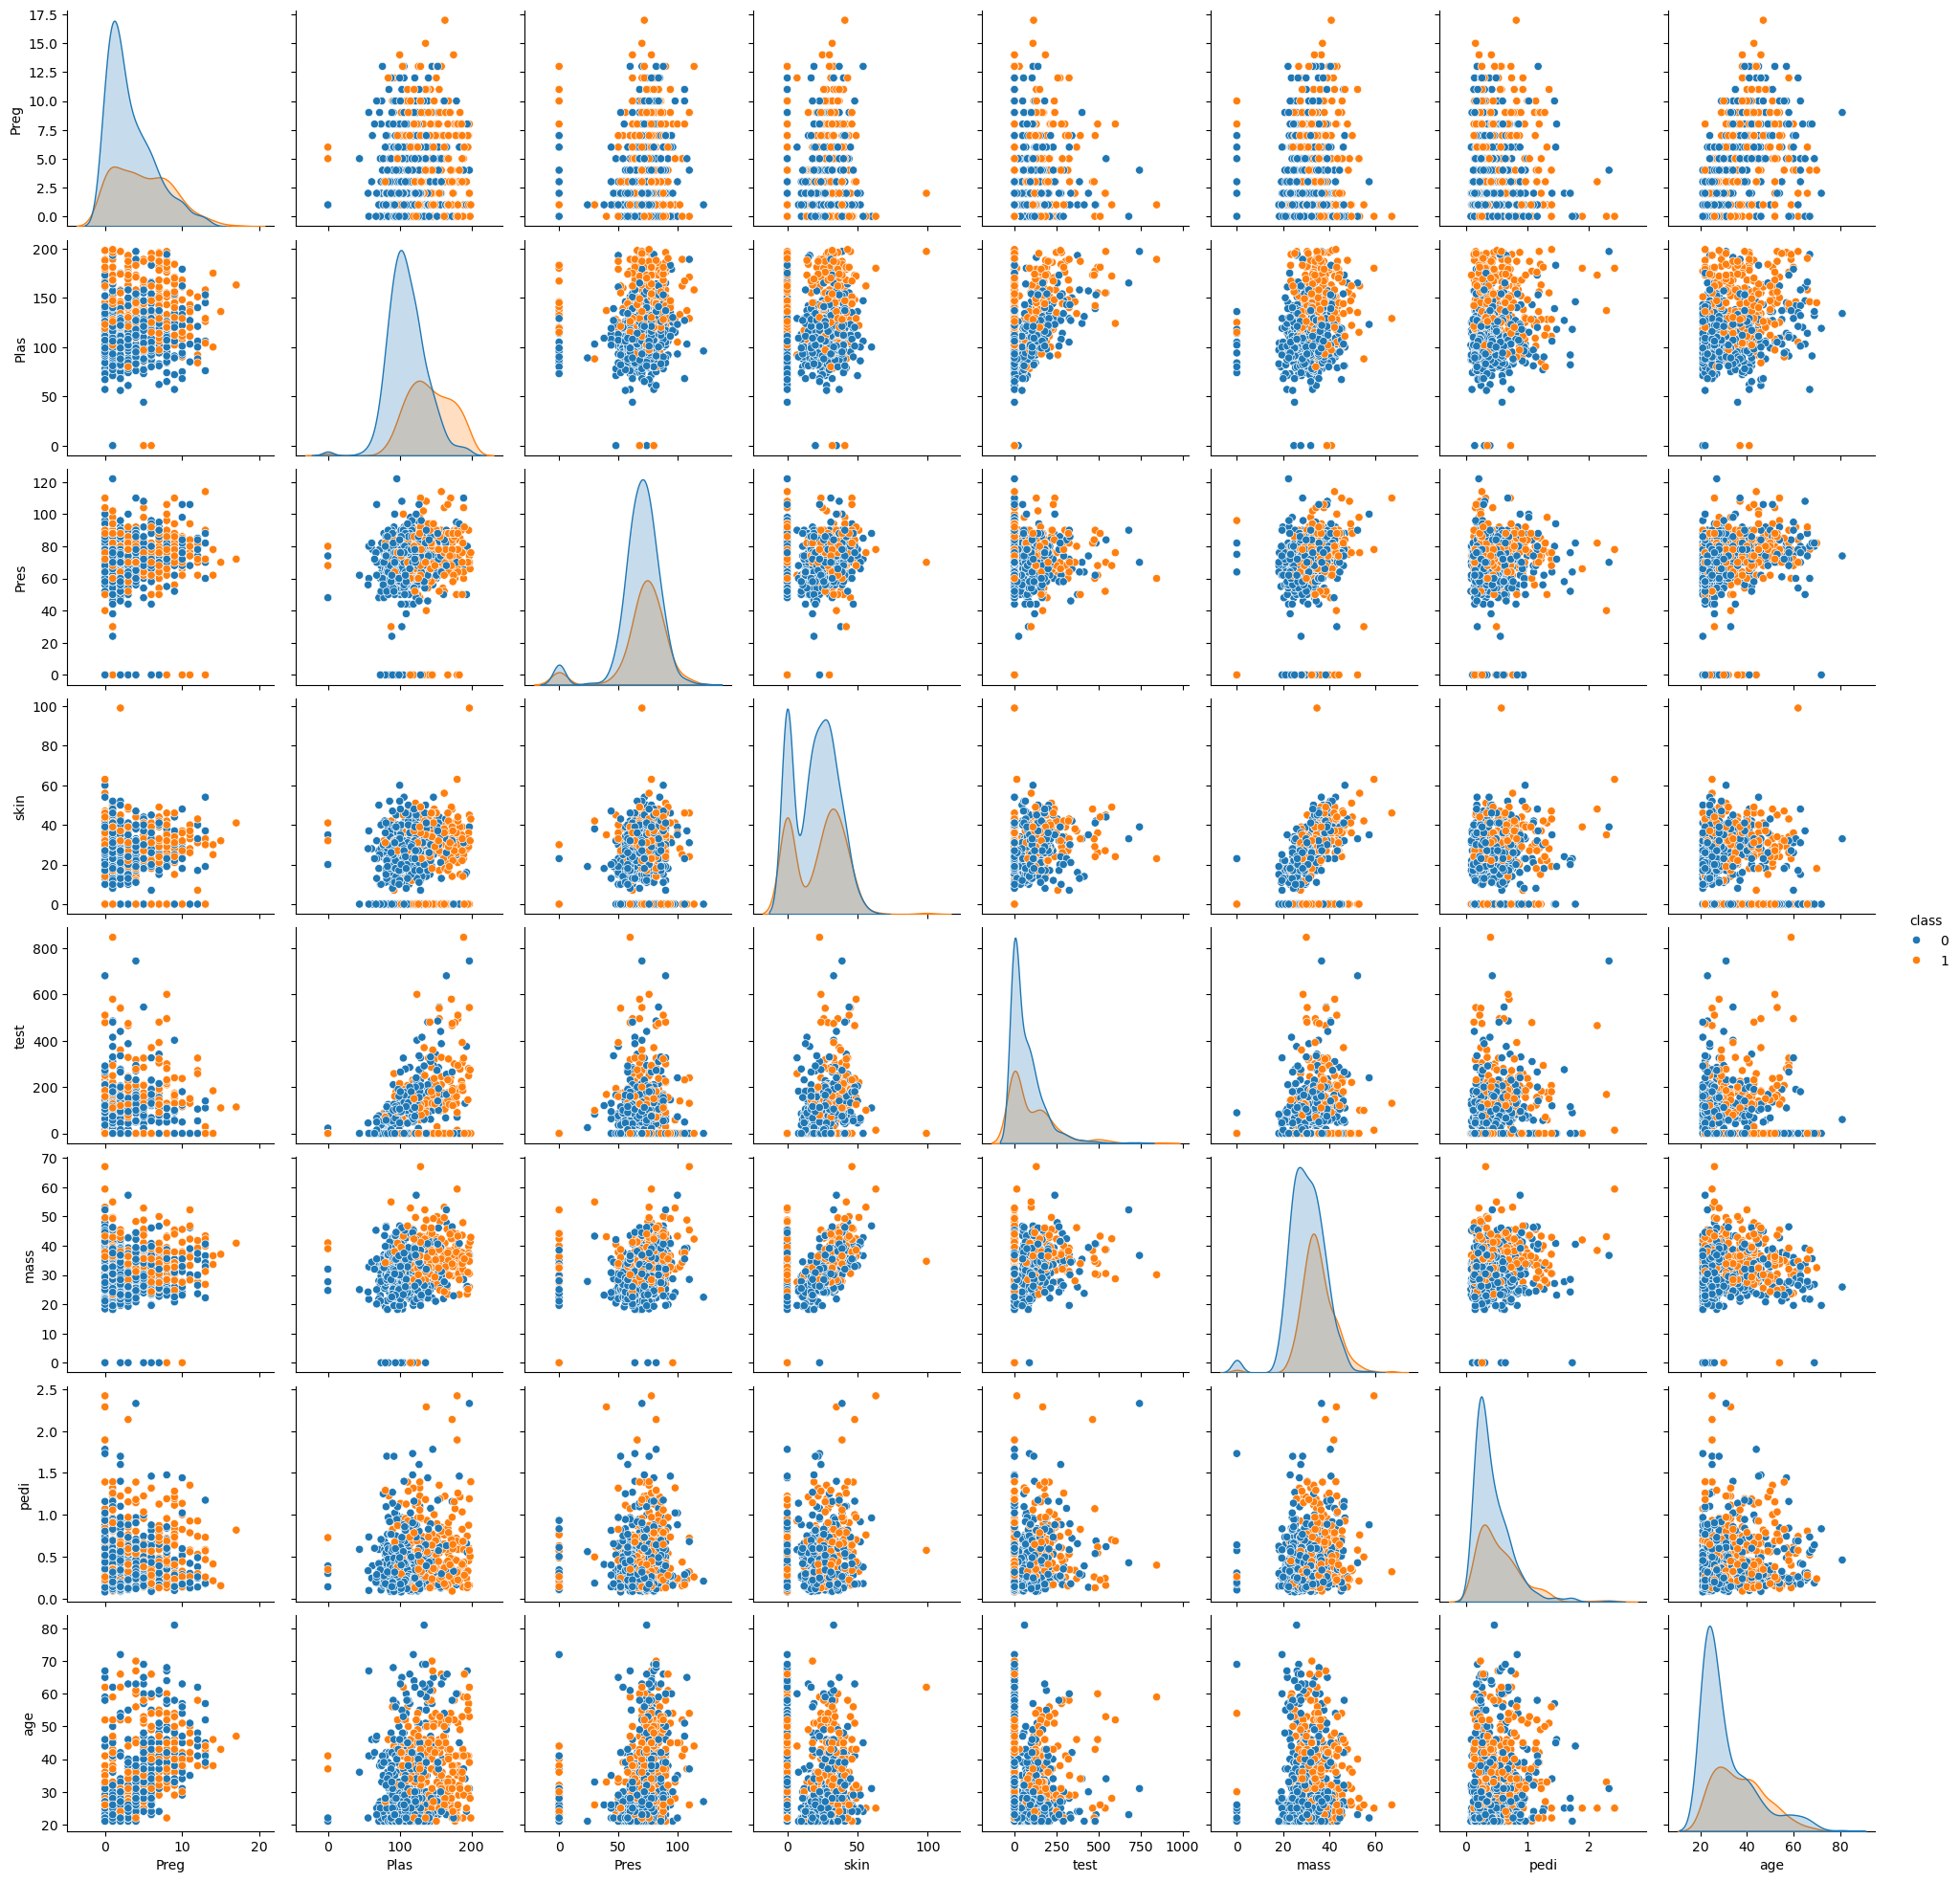

In [30]:
sns.pairplot(df, hue="class")
plt.show()

In [31]:
#data split 
X = df.iloc[:,0:7]
Y = df.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=42)

In [33]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(614, 7) (154, 7) (614,) (154,)


In [34]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [35]:
#Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [37]:
y_pred = lr.predict(X_test)

In [39]:
print(lr.coef_)
print(lr.intercept_)

[[ 1.25104422e-01  3.67978636e-02 -9.82947862e-03  4.97501686e-04
  -1.96539402e-03  9.57786909e-02  6.36864043e-01]]
[-8.30439334]


In [40]:
#Acuuracy 
from sklearn.metrics import accuracy_score

In [41]:
lr.score(X_test, Y_test)

0.7727272727272727

In [42]:
accu1 = accuracy_score(y_pred, Y_test)
accu1

0.7727272727272727

In [45]:
#metrics.confusion_matrix(Y_test, y_pred)

In [47]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()

In [49]:
gb.fit(X_train, Y_train)

GaussianNB()

In [51]:
y_pred = gb.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

In [55]:
accu2 = accuracy_score(y_pred, Y_test)
accu2

0.8116883116883117

In [57]:
import seaborn as sns

C:\Users\soniv\AppData\Local\Temp\ipykernel_18624\2745010514.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=result, palette="BuGn")


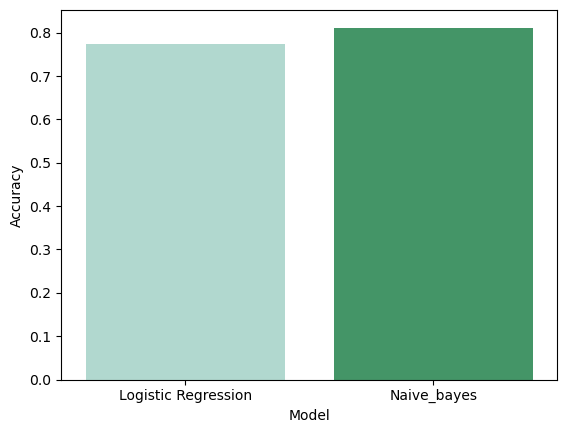

In [59]:
result = {"Model":["Logistic Regression", "Naive_bayes"],
          "Accuracy":[accu1, accu2]}

sns.barplot(x="Model", y="Accuracy", data=result, palette="BuGn")
plt.show()